# 生成数独

# 解析数独

# 解析数独

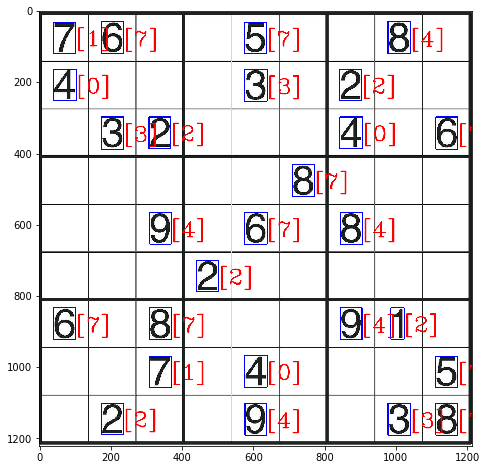

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

img = cv2.imread('images/12/SouDu1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,200,255,1)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))
dilated = cv2.dilate(thresh,kernel)
image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
boxes = []
for i in range(len(hierarchy[0])):
    if hierarchy[0][i][3] == 0:
        boxes.append(hierarchy[0][i])

data = pd.read_csv('data/MNIST.train.csv', header=0, dtype=np.int)
y = data['label'].values
x = data.values[:, 1:]
images = x.reshape(-1, 28, 28)
y = y.ravel()
x, x_test, y, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
rfc = RandomForestClassifier(100, criterion='gini', min_samples_split=2,
                             min_impurity_split=1e-10, bootstrap=True, oob_score=True)
rfc.fit(x, y)
number_boxes = []
plt.figure(figsize=(15,8), facecolor='w')

for j in range(len(boxes)):
    if boxes[j][2] != -1:
        x,y,w,h = cv2.boundingRect(contours[boxes[j][2]])
        number_boxes.append([x,y,w,h])
        number_roi = gray[y:y+h, x:x+w]
        img = cv2.rectangle(img,(x-1,y-1),(x+w+1,y+h+1),(0,0,255),2)
        
        resized_roi=cv2.resize(number_roi,(28,28))
        thresh1 = cv2.adaptiveThreshold(resized_roi,255,1,1,11,2)
        normalized_roi = thresh1
    
        ## 展开成一行让knn识别
        sample1 = normalized_roi.reshape((1,784))
        sample1 = np.array(sample1,np.float32)
        y_hat = rfc.predict(sample1)
        cv2.putText(img,str(y_hat),(x+w+1,y+h-20), 3, 2., (255, 0, 0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()